# Deep Learning and Neural Networks

## 1 Introduction

In this report, I delve into the task of image classification using the Fashion MNIST dataset, following the principles outline in Francois Chollet's Deep Learning with Python (DLWP) 4.5 workflow. I structured my approach into three major sections - ***Defining the task***, ***Developing the models***, and ***Assessing generalizability***.

Within each section, I further break down the process into specific sub-sections that mirror the corresponding steps in DLWP 4.5 workflow. This step-by-step approach ensures systematic exploration and evaluation throughout the report.

## 2 Setting the stage: Defining the task

In this section I will dive into the essential elements of problem formulation. I will explore three pivotal sub-sections *Defining the problem*, where the task type, problem statement, and overall goal are clarified; *Evaluation Metrics and Protocol* , where the chosen metrics and evaluation strategy are expounded upon; and lastly *Preparing the data*, where data preprocessing steps are detailed, setting the foundation for the development of models in the next section.

### 2.1 Defining the problem
The task falls under the realm of image classification, specifically a multi-class classification, where the objective is to categorize images based on their content.


#### 2.1.1 Problem statement and goal
I aim to develop a model capable of accurately classifying images from the Fashion MNIST dataset into their respective categories (e.g., Trouser, Pullover, Dress). With the exploration of different model architectures, my goal is to pick the best model that can effectively distinguish between the different fashion items, not just achieving a high degree of accuracy in its predictions but to also generalize well to unseen images.

#### 2.1.2 Understanding the data
- **Input data**: The Fashion MNIST dataset consists of grayscale images of various clothing items, each represented in a 28 by 28 standardized pixel format.
- **Target labels**: Each image is associated with a corresponding label representing the specific clothing category it belongs to, the table below shows the labels for the classes in accordance with the Fashion MNIST dataset. (Zalando Research, 2017)
</br>
<table border="1">
    <tr>
        <th>Label</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>T-shirt/top</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Trouser</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pullover</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Dress</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Coat</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Sandal</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Shirt</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Sneaker</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Bag</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Ankle boot</td>
    </tr>
</table>


#### 2.1.3 Exploring the data
To gain a deeper understanding of the dataset, I will first visualize a few sample images and their corresponding labels, then explore the format of the dataset by printing the shapes of the training and testing set, lastly create a data summary table.

1. **Sample Images and Labels Visualization**:

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


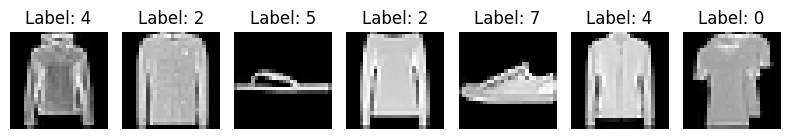

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images(x, y, num_images=7):
    plt.figure(figsize=(8, 6))
    random_indices = np.random.choice(len(x), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x[idx], cmap='gray')
        plt.title(f"Label: {y[idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_random_images(train_images, train_labels)

2. **Exploring format of dataset**:

In [3]:
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


3. **Data Summary Table**

In [4]:
from collections import Counter
import pandas as pd

class_counts = Counter(train_labels)
data_summary_df = pd.DataFrame({'Class Label': class_counts.keys(), 'Count': class_counts.values()})

print(data_summary_df.to_string(index=False))

 Class Label  Count
           9   6000
           0   6000
           3   6000
           2   6000
           7   6000
           5   6000
           1   6000
           6   6000
           4   6000
           8   6000


From the above, I can infer that there is an even distribution of data across all class, which means that the models I would be creating and exploring in later sections would not inherently favour any specific class due to an unbalanced training set.

### 2.2 Evaluation Metrics and Protocol

Before embarking on model development, establishing reliable metrics and a robust protocol is crucial to ensure that my assessment reflects the model's true generalizability.


#### 2.2.1 Choosing measures of success
To gauge how effectively the models classify the fashion items, I will employ a two-pronged approach:
1. **Primary measures for Generalizability Assessment**:
  - K-fold Cross-validation (K-fold CV): I will use K-fold CV as the primary evaluation protocol to assess the model's generalizability. This method helps mitigate overfitting by splitting the training data into multiple folds, training on different folds while evaluating on the remaining folds, and aggregating the results across folds.
  - Metrics: Within K-fold CV, I will focus on the averages and standard deviations of the following metrics:
    - **Train Loss and Validation Loss**: These reveal the model's ability to learn from the training data (train loss) and generalize that learning to unseen data (validation loss) across different folds. Lower validation loss with low standard deviation indicates better generalizability.
    - **Train Accuracy and Validation Accuracy**: Similar to loss, these metrics show the model's correctness in classifying instances on the training and validation sets across folds. Higher validation accuracy with low standard deviation suggest better generalizability.
2. **Complementary Performance analysis**:
</br> In addition to the primary measures, I will also utilize the following metrics for a more comprehensive performance analysis:
  - **Categorical accuracy**: It is defined as a metric that "calculates how often predictions match one-hot labels" (TensorFlow, 2024).
    - This metric was chosen because it provides a clear overall measure of the model's ability to correctly classify the fashion items, it is easy to interpret by representing the proportion of images correctly predicted across all the classes.
  - **Macro Precision** and **Recall**: These metrics offer valuable insights into the model's ability to identify the true positives and find all relevant instances, averaged across all classes.

This two-pronged approach ensures a robust assessment of both generalizability, thorugh K-fold CV and an overall performance, through the additional metrics.

#### 2.2.2 Deciding on an Evaluation protocol
I opted for the **K-fold Cross Validation** (K-fold CV) as my evaluation protocol. This would address the limitations of the other approaches such as:
- Traditional hold-out validation: Since the Fashion MNIST dataset is small, the traditional Hold-out method is not the most suitable evaluation protocol to proceed with as it is more prone to overfitting and may not provide reliable evaluation.
- Iterated K-fold CV: Though it increases the reliability and generalizability of the model's evaluation, it is has the highest computational cost among the three protocols.

With those in mind and considering the size of the dataset and potential overfitting, I would be using K-fold cross validation, with a moderate `k` value of 5, to have a good balance between robustness and computational efficiency. Furthermore, to avoid any biasness, I would be ensuring proper shuffling and employing `random_state` during data splitting.

### 2.3 Preparing the data
Unlike traditional approaches that require separate training, validation, and test sets, K-fold CV eliminates the need for a dedicated validation set. This is because each fold acts as a temporary validation set during its respective training iteration, ensuring all data points are utilized for both training and evaluation, while preventing data leakage.

The preprocessing steps further enhance the model's ability to learn from the data. In section 2.3.1 Normalization, the pixel values of the images are normalized, which is  a crucial step to standardize the feature scales and improve convergence during training. Next, in 2.3.2 One-hot encoding, one-hot encoding is applied to the categorical labels, transforming the class labels into a binary matrix format, which is essential for multi-class classification tasks, allowing the model to appropriately interpret and differentiate between the distinct classes.

#### 2.3.1 Normalization
To ensure that the model is less sensitive to variations in pixel intensities, facilitating a more stable learning process, the pixel values that range from 0 to 255 are normalized to range from 0 to 1.

In [5]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### 2.3.2 One-hot encoding

To allow the model to treat each class as a separate "unit" and learn meaningful distinctions between them, one-hot encoding on the target labels in the dataset is employed. From having 10 classes labelled 0 to 9, representing 0 for T-shirt/top, 1 for Trouser and so on, each label is transformed into a vector with a 1 at the index corresponding to the class and 0s elsewhere.

In [6]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000, 10)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000, 10)


## 3 Building the blocks: Developing the models

### 3.1 Theoretical baseline: Setting a random guess benchmark

Before building complex models, it is important to establish a baseline performance so that I could use it as my reference point. This reference serves as a benchmark against which I can compare the effectiveness of the models I will be building in later sections.

#### 3.1.1 Explanation of theoretical baseline
If I were to guess the label for a new image completely at random, what would be the probability of selecting the correct class? This probability represents the theoretical baseline accuracy.

#### 3.1.2 Calculating the probability
The theoretical baseline accuracy is the ratio of the number of classes, to the total number of possible predictions - which is always the same as the number of classes. With that, the formula would be:

$$
P (theoretical \space baseline \space accuracy) = \frac{Number \space of \space classes}{Total \space number \space of \space possible \space predictions}
$$

#### 3.1.3 Application to the dataset
Having 10 classes in the Fashion MNIST dataset, would give the probability of:
$$
P (theoretical \space baseline \space accuracy) = \frac{10 \space classes}{10 \space total \space possible \space predictions} \times 100
$$
$$ P = 10%$$

This implies that by randomly guess the label for an image, there is a 10% chance of picking the correct class. This **10%** becomes the **baseline accuracy** against which I will compare the performance of the models in the following sections.

### 3.2 Developing a model that does better than a baseline

Building a model that beats the theoretical baseline of 10% accuracy is my first objective. To achieve this and ensure significant results, I will use the said evaluation protocol K-fold CV during training and evaluation. Additionally, I will define custom metrics to gain in depth insights into the model's performance beyond the standard accuracy.

#### 3.2.1 Custom metrics
The two custom metrics are **Macro Precision** and **Macro Recall**, as referenced by Arnaldo Gualberto's *Custom metrics for Keras/Tensorflow*. Both custom metrics calculate the average precision and recall across all classes respectively, offering a balanced view and insights into the model's ability to identify the true positives and to find all relevant instances, as explained in section 2.2.1 Choosing measures of success.

In [8]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

def macro_precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

def macro_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras

### 3.2.2 Simple model

The goal of this simple model is to have statistical power, focusing on achieving a performance that beats the baseline, which using the smallest possible architecture. This approach would prioritize efficiency and interpretability while ensuring that the model surpasses the theoretical baseline accuracy.

#### 3.2.2.1 Simple model configuration choices
- **Single output layer**
  - The simple model would use a single dense layer with 10 neurons, one for each of the class and a softmax activation function. With this configuration, it would directly map the input features to the class probabilities.
- **Softmax activation**
  - The softmax activation would ensure the output probabilities sum to 1, which represents the probability of each class for a given image.
- **Adam optimizer**
  - As stated in Tensorflow's guide on Basic classification, "optimizer is how the model is updated based on the data it sees and its loss function." (Tensorflow, 2024). Adam optimizer is the recommended optimizer for its efficiency and effectiveness in gradient descent optimization. This would help the model learn effectively from the data.
- **Categorical Crossentropy loss**
  - Given my data format of one-hot encoded labels, Categorical Crossentropy is the optimal choice for my loss function, as supported by my interpretation from Pykes' *Cross-Entropy Loss Function in Machine Learning: Enhancing Model Accuracy*, the loss function measures the discrepancy between the predicted and true class probabilities, guiding the model towards minimizing the error during training.
- **Early stopping callback**: Simple models can overfit too so training should stop when the validation loss does not improve for 3 epochs, hence the need for an early stopping callback to monitor the `val_loss`.

**Summary of Simple model configuration:**
<table border="1">
    <tr>
        <th>Configuration</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Layers</td>
        <td>1 input, 1 output</td>
    </tr>
    <tr>
        <td>No. of neurons</td>
        <td>10 in output</td>
    </tr>
    <tr>
        <td>Activation function</td>
        <td>Softmax in output</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>Categorical Crossentropy</td>
    </tr>
    <tr>
        <td>Optimizer</td>
        <td>Adam</td>
    </tr>
    <tr>
        <td>Metrics</td>
        <td>Categorical accuracy, Macro precision, Macro recall</td>
    </tr>
    <tr>
        <td>Early stopping</td>
        <td>Enabled, with 3 epochs patience and validation loss for monitoring</td>
    </tr>
    <tr>
      <td>Epochs</td>
      <td>5 epochs</td>
    </tr>
</table>

#### 3.2.2.2 Building the simple model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

simple_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation=softmax, name='output')
], name='simple_model')

metrics = [
    CategoricalAccuracy(name="categorical_accuracy"),
    macro_precision,
    macro_recall
]

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

simple_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=metrics)

simple_model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from sklearn.model_selection import KFold

n_splits = 5
kfold = KFold(n_splits, shuffle=True, random_state=42)

class_indices = train_labels.argmax(axis=1)

fold_wise_train_loss = []
fold_wise_val_loss = []
fold_wise_train_accuracy = []
fold_wise_val_accuracy = []
fold_wise_val_macro_precision = []
fold_wise_val_macro_recall = []

for fold_num, (train_index, val_index) in enumerate(kfold.split(train_images, class_indices)):
  print(f'Fold {fold_num + 1}/{n_splits} - Last 2 Epochs:')

  x_train_fold, x_val_fold = train_images[train_index], train_images[val_index]
  y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

  simple_model_history = simple_model.fit(x_train_fold, y_train_fold, epochs=5,
                            validation_data=(x_val_fold, y_val_fold), callbacks=[early_stopping], verbose=0)

  fold_wise_train_loss.append(simple_model_history.history['loss'])
  fold_wise_val_loss.append(simple_model_history.history['val_loss'])
  fold_wise_train_accuracy.append(simple_model_history.history['categorical_accuracy'])
  fold_wise_val_accuracy.append(simple_model_history.history['val_categorical_accuracy'])
  fold_wise_val_macro_precision.append(simple_model_history.history['val_macro_precision'])
  fold_wise_val_macro_recall.append(simple_model_history.history['val_macro_recall'])


  last_2_val_categorical_accuracy = simple_model_history.history['val_categorical_accuracy'][-2:]
  last_2_val_macro_precision = simple_model_history.history['val_macro_precision'][-2:]
  last_2_val_macro_recall = simple_model_history.history['val_macro_recall'][-2:]

  for epoch in range(len(last_2_val_categorical_accuracy)):
      print(f"Epoch {epoch + 1}:")
      print(f"\tCategorical Accuracy: {last_2_val_categorical_accuracy[epoch]}")
      print(f"\tMacro Precision: {last_2_val_macro_precision[epoch]}")
      print(f"\tMacro Recall: {last_2_val_macro_recall[epoch]}")

Fold 1/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.8502500057220459
	Macro Precision: 0.8852860331535339
	Macro Recall: 0.8139166831970215
Epoch 2:
	Categorical Accuracy: 0.8463333249092102
	Macro Precision: 0.8801720142364502
	Macro Recall: 0.8118333220481873
Fold 2/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.8541666865348816
	Macro Precision: 0.886608898639679
	Macro Recall: 0.8265833258628845
Epoch 2:
	Categorical Accuracy: 0.8656666874885559
	Macro Precision: 0.891680896282196
	Macro Recall: 0.8349166512489319
Fold 3/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.8676666617393494
	Macro Precision: 0.8942297101020813
	Macro Recall: 0.8395833373069763
Epoch 2:
	Categorical Accuracy: 0.8654166460037231
	Macro Precision: 0.8944673538208008
	Macro Recall: 0.8371666669845581
Fold 4/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.8647500276565552
	Macro Precision: 0.8900879621505737
	Macro Recall: 0.8401666879653931
Epoch 2:
	Categorical Accuracy: 0.8585833311

#### 3.2.2.3 Metrics for Generalizability Assessment

Below, the performance of the model across different folds is visually summarized using a plot that showcases the average and standard deviation of key metrics. The plot includes trends for both training and validation sets over each fold. With the four said metrics in section 2.2.1 Choosing measures of success.

Each metric's average is represented by a solid line, while the shaded regions around the line indicate the standard deviation. This visualization provides valuable insights into the model's consistency and generalizability across different subsets of the dataset. The x-axis represents individual folds, and the y-axis represents the corresponding values for loss and accuracy.

The plot allows for a comprehensive understanding of how the model performs on average and the extent of variability across folds, aiding in the assessment of its robustness and generalization capabilities.


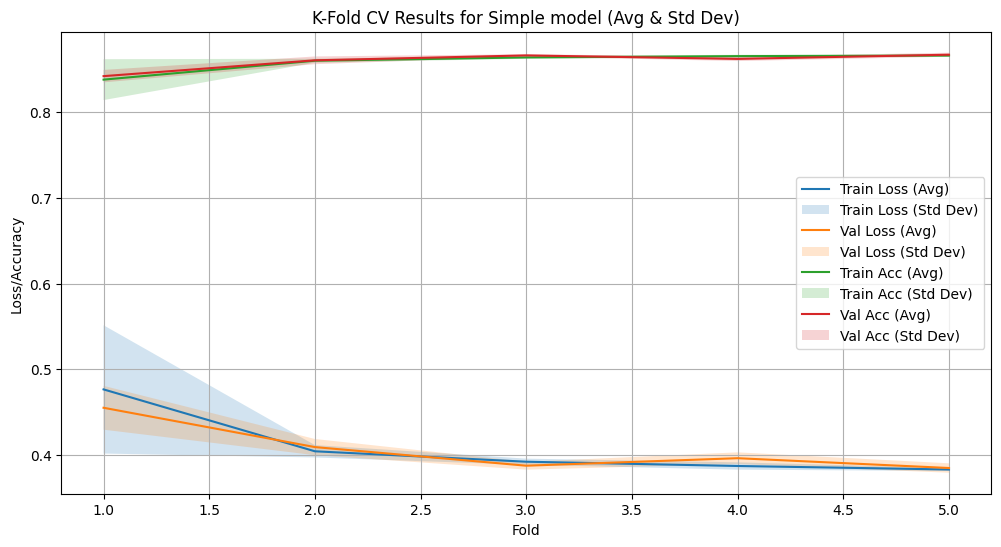

In [11]:
avg_train_loss = []
avg_val_loss = []
avg_train_acc = []
avg_val_acc = []
std_train_loss = []
std_val_loss = []
std_train_acc = []
std_val_acc = []

for i in range(len(fold_wise_train_loss)):
    avg_train_loss.append(np.mean(fold_wise_train_loss[i]))
    std_train_loss.append(np.std(fold_wise_train_loss[i]))
    avg_val_loss.append(np.mean(fold_wise_val_loss[i]))
    std_val_loss.append(np.std(fold_wise_val_loss[i]))
    avg_train_acc.append(np.mean(fold_wise_train_accuracy[i]))
    std_train_acc.append(np.std(fold_wise_train_accuracy[i]))
    avg_val_acc.append(np.mean(fold_wise_val_accuracy[i]))
    std_val_acc.append(np.std(fold_wise_val_accuracy[i]))

num_folds = n_splits

plt.figure(figsize=(12, 6))

# Train Loss
plt.plot(range(1, num_folds + 1), avg_train_loss, label='Train Loss (Avg)')
plt.fill_between(range(1, num_folds + 1), np.subtract(avg_train_loss, std_train_loss), np.add(avg_train_loss, std_train_loss), alpha=0.2, label='Train Loss (Std Dev)')

# Validation Loss
plt.plot(range(1, num_folds + 1), avg_val_loss, label='Val Loss (Avg)')
plt.fill_between(range(1, num_folds + 1), np.subtract(avg_val_loss, std_val_loss), np.add(avg_val_loss, std_val_loss), alpha=0.2, label='Val Loss (Std Dev)')

# Train Accuracy
plt.plot(range(1, num_folds + 1), avg_train_acc, label='Train Acc (Avg)')
plt.fill_between(range(1, num_folds + 1), np.subtract(avg_train_acc, std_train_acc), np.add(avg_train_acc, std_train_acc), alpha=0.2, label='Train Acc (Std Dev)')

# Validation Accuracy
plt.plot(range(1, num_folds + 1), avg_val_acc, label='Val Acc (Avg)')
plt.fill_between(range(1, num_folds + 1), np.subtract(avg_val_acc, std_val_acc), np.add(avg_val_acc, std_val_acc), alpha=0.2, label='Val Acc (Std Dev)')

plt.xlabel('Fold')
plt.ylabel('Loss/Accuracy')
plt.title('K-Fold CV Results for Simple model (Avg & Std Dev)')
plt.legend()

plt.grid(True)
plt.show()

**Observations**:</br>
The K-fold CV results for the Simple model suggest promising signs of generalization and potential good performance on unseen data. Below are observations to support this conclusion.

*Convergence:*
- Convergence in both loss and accuracy: This is an important observation indicating the model is learning generalizable patterns from the data. As the training progresses through the folds, the gap between the training and validation metrics reduces, suggesting the model is not solely memorizing specific examples but capturing patterns.
- Early convergence in accuracy metrics: The relatively early convergence of accuracy metrics, slightly after 1.5 folds, suggest that the model quickly learns the essential features needed for good performance. This is a positive sign, as it indicates the model is efficient.
- Convergence in loss metrics: While the loss metrics converge slightly later than accuracy, their convergence around 1.7th fold still indicate the model is not overfitting. The initial decrease in loss might be steeper due to the simple architecture of only 1 layer (Output layer), but the subsequent convergence imply the model avoids memorizing specific noise and patterns in the data.

*Standard Deviation:*
- Wide initial standard deviation: The wider standard deviation in the first fold, particularly for both loss and accuracy metrics, is expected. This is not necessarily concerning, as the standard deviation narrows in subsequent folds.
- Narrowing standard deviation: The gradual decrease in standard deviation across folds for both metrics indicate increasing stability in the model's performance.

Overall, the K-Fold CV results for the simple model with one output layer and softmax activation function are encouraging. The convergence of both loss and accuracy metrics, along with the narrowing standard deviation, suggests the model is effectively learning generalizable patterns and has the potential to perform well on unseen data.

Below are codes to calculate and print the average values of Categorical accuracy, Macro Precision, and Macro Recall, to evaluate the performance of the Simple model

In [12]:
avg_categorical_acc = np.mean([np.mean(fold[-1]) for fold in fold_wise_val_accuracy])
avg_macro_precision = np.mean([np.mean(fold[-1]) for fold in fold_wise_val_macro_precision])
avg_macro_recall = np.mean([np.mean(fold[-1]) for fold in fold_wise_val_macro_recall])

print("Based on the K-Fold CV results using Simple model:")
print("Average Categorical Accuracy (Validation):", round(avg_categorical_acc, 4))
print("Average Macro Precision (Validation):", round(avg_macro_precision, 4))
print("Average Macro Recall (Validation):", round(avg_macro_recall, 4))

Based on the K-Fold CV results using Simple model:
Average Categorical Accuracy (Validation): 0.8604
Average Macro Precision (Validation): 0.8893
Average Macro Recall (Validation): 0.8311


The average **categorical accuracy** on the validation set across folds was 0.8604, implying that the model can correctly classify around **86%** of the examples on average.
The average **macro precision** of **0.89** and **macro recall** of **0.83** were both encouraging, indicating a reasonable balance between identifying true positives and avoiding false positives across all classes.These results are promising for a simple model and beats the theoretical baseline accuracy of 10%.

In the next section 3.3, I will build upon this success by creating a scaled-up model that intentionally overfits the training data as a step towards understanding the trade-off between model complexity and overfitting, which is Step 6 in the DLWP 4.5 workflow. This exploration will allow me to analyze the limitations of a simpler model and explore the potential benefits of increasing model capacity, while keeping in mind the risk of overfitting.

### 3.3 Scaling up - developing a model that overfits

Following the DLWP 4.5 workflow, I delve into investigating the concept of overfitting. I create a more complex model, a scaled-up version of the simple model, which aims to induce overfitting. This scaled-up model incorporates a deeper architecture with a larger number of neurons, potentially increasing its capacity to memorize the training data.

By disabling the early stopping in this experiment, I allow the model to train for a longer duration without the constraint of stopping on validation loss improvement. This can lead to the model overfitting the training data, focusing too much on memorizing specific patterns that might not generalize well on the validation set.

Analyzing the performance of this model compared to the simpler model with early stopping will provide valuable insights into the said trade-off.

#### 3.3.1 Scaled-up model configuration choices

<table border="1">
    <tr>
        <th>Configuration</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Layers</td>
        <td>1 input, 1 hidden, 1 output</td>
    </tr>
    <tr>
        <td>No. of neurons</td>
        <td>64 in hidden, 10 in output</td>
    </tr>
    <tr>
        <td>Activation function</td>
        <td>ReLU in hidden, Softmax in output</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>Same configuration as Simple model</td>
    </tr>
    <tr>
        <td>Optimizer</td>
        <td>Same configuration as Simple model</td>
    </tr>
    <tr>
        <td>Metrics</td>
        <td>Same configuration as Simple model</td>
    </tr>
    <tr>
        <td>Early stopping</td>
        <td>Disabled</td>
    </tr>
    <tr>
      <td>Epochs</td>
      <td>Quadruple of the Simple model, 20 epochs</td>
    </tr>
</table>

In [13]:
scaledUp_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu', name='hidden1'),
    Dense(10, activation=softmax, name='output')
], name='scaledUp_model')

metrics = [
    CategoricalAccuracy(name="categorical_accuracy"),
    macro_precision,
    macro_recall
]

scaledUp_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=metrics)

scaledUp_model.summary()

Model: "scaledUp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
n_splits = 5
kfold = KFold(n_splits, shuffle=True, random_state=42)

class_indices = train_labels.argmax(axis=1)

scaledUp_model_fold_wise_train_loss = []
scaledUp_model_fold_wise_val_loss = []
scaledUp_model_fold_wise_train_accuracy = []
scaledUp_model_fold_wise_val_accuracy = []
scaledUp_model_fold_wise_val_macro_precision = []
scaledUp_model_fold_wise_val_macro_recall = []

for fold_num, (train_index, val_index) in enumerate(kfold.split(train_images, class_indices)):
  print(f'Fold {fold_num + 1}/{n_splits} - Last 2 Epochs:')

  x_train_fold, x_val_fold = train_images[train_index], train_images[val_index]
  y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

  scaledUp_model_history = scaledUp_model.fit(x_train_fold, y_train_fold, epochs=20,
                            validation_data=(x_val_fold, y_val_fold), callbacks=[], verbose=0)

  scaledUp_model_fold_wise_train_loss.append(scaledUp_model_history.history['loss'])
  scaledUp_model_fold_wise_val_loss.append(scaledUp_model_history.history['val_loss'])
  scaledUp_model_fold_wise_train_accuracy.append(scaledUp_model_history.history['categorical_accuracy'])
  scaledUp_model_fold_wise_val_accuracy.append(scaledUp_model_history.history['val_categorical_accuracy'])
  scaledUp_model_fold_wise_val_macro_precision.append(scaledUp_model_history.history['val_macro_precision'])
  scaledUp_model_fold_wise_val_macro_recall.append(scaledUp_model_history.history['val_macro_recall'])

  scaledUp_model_last_2_val_categorical_accuracy = scaledUp_model_history.history['val_categorical_accuracy'][-2:]
  scaledUp_model_last_2_val_macro_precision = scaledUp_model_history.history['val_macro_precision'][-2:]
  scaledUp_model_last_2_val_macro_recall = scaledUp_model_history.history['val_macro_recall'][-2:]

  for epoch in range(len(scaledUp_model_last_2_val_categorical_accuracy)):
      print(f"Epoch {epoch + 1}:")
      print(f"\tCategorical Accuracy: {scaledUp_model_last_2_val_categorical_accuracy[epoch]}")
      print(f"\tMacro Precision: {scaledUp_model_last_2_val_macro_precision[epoch]}")
      print(f"\tMacro Recall: {scaledUp_model_last_2_val_macro_recall[epoch]}")

Fold 1/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.8880833387374878
	Macro Precision: 0.9029617309570312
	Macro Recall: 0.8774999976158142
Epoch 2:
	Categorical Accuracy: 0.8891666531562805
	Macro Precision: 0.9038446545600891
	Macro Recall: 0.8777499794960022
Fold 2/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.9127500057220459
	Macro Precision: 0.9209719896316528
	Macro Recall: 0.906166672706604
Epoch 2:
	Categorical Accuracy: 0.9054999947547913
	Macro Precision: 0.912502110004425
	Macro Recall: 0.9008333086967468
Fold 3/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.9289166927337646
	Macro Precision: 0.9348917007446289
	Macro Recall: 0.9234166741371155
Epoch 2:
	Categorical Accuracy: 0.9269999861717224
	Macro Precision: 0.933234453201294
	Macro Recall: 0.9205833077430725
Fold 4/5 - Last 2 Epochs:
Epoch 1:
	Categorical Accuracy: 0.9363333582878113
	Macro Precision: 0.9406737685203552
	Macro Recall: 0.9329166412353516
Epoch 2:
	Categorical Accuracy: 0.93716669082

#### 3.3.2 Metrics for Generalizability Assessment

Likewise, I plotted the same K-fold CV results for the Scaled-up model as seen below.

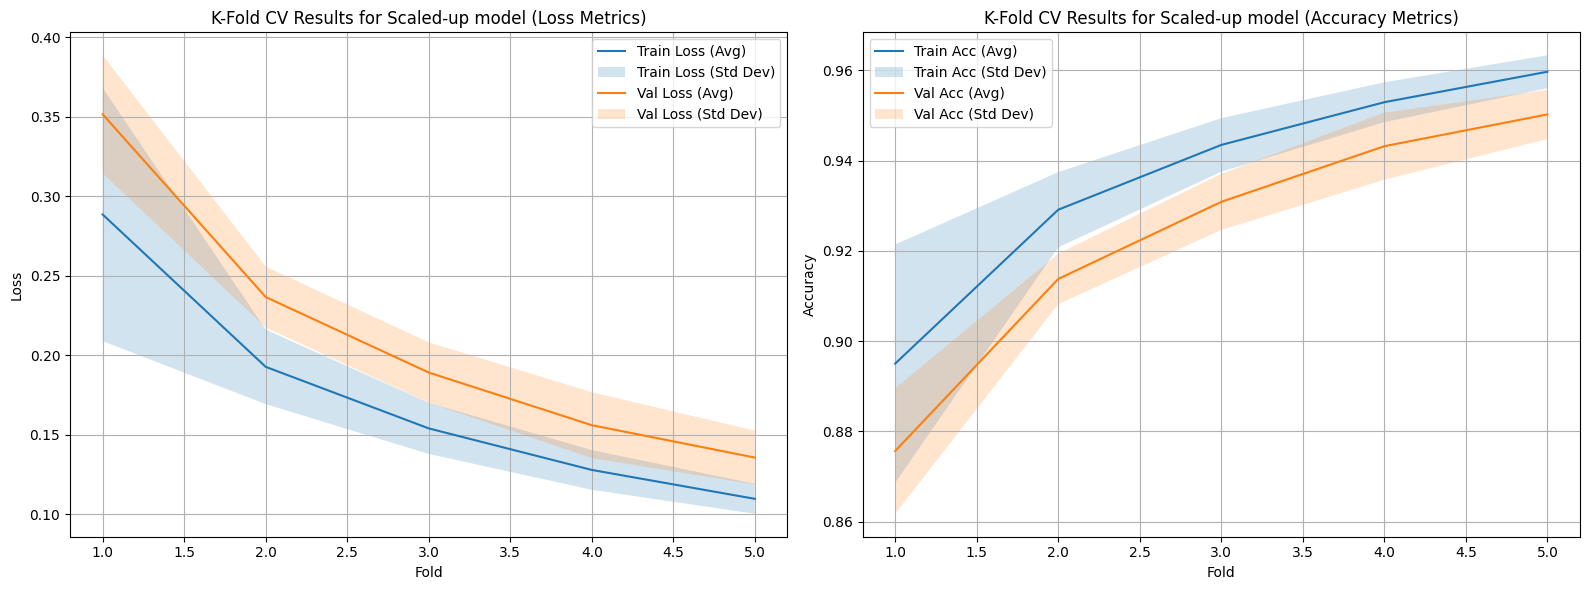

In [15]:
import matplotlib.pyplot as plt
import numpy as np

scaledUp_model_avg_train_loss = []
scaledUp_model_avg_val_loss = []
scaledUp_model_avg_train_acc = []
scaledUp_model_avg_val_acc = []
scaledUp_model_std_train_loss = []
scaledUp_model_std_val_loss = []
scaledUp_model_std_train_acc = []
scaledUp_model_std_val_acc = []

for i in range(len(scaledUp_model_fold_wise_train_loss)):
    scaledUp_model_avg_train_loss.append(np.mean(scaledUp_model_fold_wise_train_loss[i]))
    scaledUp_model_std_train_loss.append(np.std(scaledUp_model_fold_wise_train_loss[i]))
    scaledUp_model_avg_val_loss.append(np.mean(scaledUp_model_fold_wise_val_loss[i]))
    scaledUp_model_std_val_loss.append(np.std(scaledUp_model_fold_wise_val_loss[i]))
    scaledUp_model_avg_train_acc.append(np.mean(scaledUp_model_fold_wise_train_accuracy[i]))
    scaledUp_model_std_train_acc.append(np.std(scaledUp_model_fold_wise_train_accuracy[i]))
    scaledUp_model_avg_val_acc.append(np.mean(scaledUp_model_fold_wise_val_accuracy[i]))
    scaledUp_model_std_val_acc.append(np.std(scaledUp_model_fold_wise_val_accuracy[i]))

num_folds = n_splits

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for Loss Metrics
axes[0].plot(range(1, num_folds + 1), scaledUp_model_avg_train_loss, label='Train Loss (Avg)')
axes[0].fill_between(range(1, num_folds + 1), np.subtract(scaledUp_model_avg_train_loss, scaledUp_model_std_train_loss),
                     np.add(scaledUp_model_avg_train_loss, scaledUp_model_std_train_loss), alpha=0.2, label='Train Loss (Std Dev)')
axes[0].plot(range(1, num_folds + 1), scaledUp_model_avg_val_loss, label='Val Loss (Avg)')
axes[0].fill_between(range(1, num_folds + 1), np.subtract(scaledUp_model_avg_val_loss, scaledUp_model_std_val_loss),
                     np.add(scaledUp_model_avg_val_loss, scaledUp_model_std_val_loss), alpha=0.2, label='Val Loss (Std Dev)')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Loss')
axes[0].set_title('K-Fold CV Results for Scaled-up model (Loss Metrics)')
axes[0].legend()
axes[0].grid(True)

# Plot for Accuracy Metrics
axes[1].plot(range(1, num_folds + 1), scaledUp_model_avg_train_acc, label='Train Acc (Avg)')
axes[1].fill_between(range(1, num_folds + 1), np.subtract(scaledUp_model_avg_train_acc, scaledUp_model_std_train_acc),
                     np.add(scaledUp_model_avg_train_acc, scaledUp_model_std_train_acc), alpha=0.2, label='Train Acc (Std Dev)')
axes[1].plot(range(1, num_folds + 1), scaledUp_model_avg_val_acc, label='Val Acc (Avg)')
axes[1].fill_between(range(1, num_folds + 1), np.subtract(scaledUp_model_avg_val_acc, scaledUp_model_std_val_acc),
                     np.add(scaledUp_model_avg_val_acc, scaledUp_model_std_val_acc), alpha=0.2, label='Val Acc (Std Dev)')

axes[1].set_xlabel('Fold')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('K-Fold CV Results for Scaled-up model (Accuracy Metrics)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Observations**:</br>
The K-Fold CV results for the Scaled-up model reveal strong indications of overfitting. Below are detailed observations to support this conclusion.

*Loss metrics:*
- Decreasing trend: While the loss generally decreases across folds, it is important to consider the gap between the training and validation loss. A well generalized model should have both losses converging towards a similar value. However, as plotted above, the persistent gap between the two suggest the model is primarily learning the training data's  idiosyncrasies rather than capturing generalizable patterns.
- Steeper initial decrease: The sharp decrease in loss from the first few folds implies that the model is quickly memorizing the training data specific to those folds. This is a strong indicator for overfitting.
- Narrower validation loss standard deviation: The slightly tighter standard deviation of validation loss compared to training loss show that the model is fitting consistently to the validation sets across folds. However, this consistency is likely due to overfitting to the validation data within each fold, rather than learning generalizable features.

*Accuracy metrics:*
- Increasing trend: The rising trend in both training and validation accuracy is concerning. Though it might seem positive, as it aligns with the decreasing loss, this suggests that the model is fitting closely to the noise and specific patterns in the data, leading to spurious accuracy.
- Similar pattern to loss: The similarity in the pattern of increasing validation accuracy and decreasing loss reinforces the concern of overfitting. Both indicate the model is learning patterns specific to the training and validation data, leading to inflated accuracy that would not generalize well to unseen data.
- Wide training accuracy standard deviation: The wider standard deviation of training accuracy, especially in the initial folds, imply that the model's performance is highly variable on different training data splits. This further strengthens the case for overfitting, because a well generalizing model should exhibit consistent performance across different training set variations.


In conclusion, the K-Fold CV results provide strong evidence that the scaled-up model is overfitting. The continuous decrease in loss with a persistent gap between training and validation loss, along with the increasing trends in accuracy and the wider standard deviation of training accuracy, all point towards the model memorizing specific patterns in the training data rather than learning generalizable features.

In the following section 3.4 Regularizing and tuning hyperparameters, I will further explore model architectures and employ techniques to address the overfitting, sugh as regularization and tuning of hyperparameters to improve the model's performance on unseen data.

#### 3.3.3 Model evaluation



In [16]:
scaledUp_model_avg_categorical_acc = np.mean([np.mean(fold[-1]) for fold in scaledUp_model_fold_wise_val_accuracy])
scaledUp_model_avg_macro_precision = np.mean([np.mean(fold[-1]) for fold in scaledUp_model_fold_wise_val_macro_precision])
scaledUp_model_avg_macro_recall = np.mean([np.mean(fold[-1]) for fold in scaledUp_model_fold_wise_val_macro_recall])

print("Based on the K-Fold CV results using Scaled up model:")
print("Average Categorical Accuracy (Validation):", round(scaledUp_model_avg_categorical_acc, 4))
print("Average Macro Precision (Validation):", round(scaledUp_model_avg_macro_precision, 4))
print("Average Macro Recall (Validation):", round(scaledUp_model_avg_macro_recall, 4))

Based on the K-Fold CV results using Scaled up model:
Average Categorical Accuracy (Validation): 0.9195
Average Macro Precision (Validation): 0.9269
Average Macro Recall (Validation): 0.9139


Based on the K-Fold CV results using the Scaled-up model, the average **categorical accuracy** is 0.9195, which is **92%**, **macro precision** of **0.93**, and **macro recall** of also **0.91** on the validation set, are high, implying the model's ability to correctly classify a significant portion of the validation data and retrieve relevant instances across all classes on average.

### 3.4 Regularizing and tuning hyperparameters

As presented in Chapter 6 of the DLWP 4.5, regularizing and hyperparameter tuning can be done automatedly using `KerasTuner`. Hence, I will employ a combined approach that effectively merges `KerasTuner` for hyperparameter tuning, and exploration of different model architectures.

This combine approach offers various advantages such as:
1. Flexibility, where I define a flexible base model building function, that is capable of creating various model architectures based on the hyperparameters I define. This would eliminate the need for separate model definitions and allow me to explore a wider search space.
2. Exploration, where instead of limiting myself to predefined models like explicitly defining a fixed number of layers or fixed dropout rates, I can explore a broader range of possibilities by defining a search space for hyperparameters that go beyond what I mentioned like units per layer, optimizer and its learning rate, regularization strength, number of epochs and batch size.

With this approach I will break the section into two main aspects, 3.4.1 Hyperparameter tuning for base model selection, focuses on using `KerasTuner` to identify the best base model architecture and optimization configuration. The second aspect 3.4.2 Evaluating regularization techniques, focuses on applying different regularization techniques such as L2 regularization, Dropout regularization or Combined regularization, on the base model with the best hyperparameters identified in 3.4.1.

The model with the most promising results in terms of cross validation accuracy would be what I would use to evaluate on the test set in the following section.

#### 3.4.1 Hyperparameter tuning for base model selection

There is an exhaustive list of hyperparameters that I could choose from to tune, but including all of them would be excessive and computationally expensive for the two main reasons of **The Curse of Dimensionality** and **Overfitting the Search Space**.

Hence, I will prioritize the following hyperparameters:

1. **Number of hidden layers**: Since this directly impacts the model's capacity to learn complex relationships, it is crucial to prioritize it for exploring different configurations that can help determine the optimal complexity for the task.
2. **Units per layer**: The number of neurons in each hidden layer influences the model's representational power. Tuning this hyperparameter can improve performance.
3. **Optimizer**: Choosing the right optimization algorithm is crucial for efficient learning. Tuning the optimizer (e.g., RMSprop , Adagrad, and Adam) helps find the algorithm that best navigates the loss landscape to reach an optimal solution.
4. **Learning rate**: The learning rate controls the step size taken by the optimizer during training. Tuning this parameter ensures efficient convergence, by preventing the model from taking too large or too small steps in the optimization process.

By focusing on these core hyperparameters, I aim to achieve a balance between exploring diverse model configurations and avoiding overfitting the search space. This approach allows me to identify a strong foundation of which is the base model, for further improvement through regularization techniques in the next sub-section.

##### 3.4.1.1 Base model architecture
The base model architecture is defined in the function `call_existing_code` which was referenced to the codes in the Developer guides *Getting started with KerasTuner* by Chollet et al., 2019.

<table border="1">
    <tr>
        <th>Hyperparameter</th>
        <th>Description</th>
        <th>Search space</th>
    </tr>
    <tr>
        <td><b>num_hidden_layers</b></td>
        <td>The number of hidden layers in the neural network</td>
        <td>Min: 1, Max: 3, Step size of 1</td>
    </tr>
    <tr>
        <td><b>units</b></td>
        <td>The number of units in each hidden layer</td>
        <td>Min: 32, Max: 256, Step size of 32</td>
    </tr>
    <tr>
        <td><b>optimizer_name</b></td>
        <td>Adjusts the weights during training to minimize the loss function</td>
        <td>RMSprop, Adagrad, Adam</td>
    </tr>
    <tr>
        <td><b>lr</b></td>
        <td>The learning rate for the optimizer</td>
        <td>Min: 1e-4, Max: 1e-2, Sampling of log</td>
    </tr>
</table>

In [17]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras import regularizers
import keras_tuner

def call_existing_code(num_hidden_layers, units, optimizer_name, lr):
    model = keras.Sequential()
    model.add(layers.Flatten())

    for _ in range(num_hidden_layers):
        model.add(layers.Dense(units=units, activation="relu"))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(
        optimizer=getattr(keras.optimizers, optimizer_name)(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["categorical_accuracy"],
    )

    return model

##### 3.4.1.2 Hyperparameter Search space

The hyperparameter search space is defined in the `build_model` function, which is likewise referenced from the same Developer guides as in the previous sub-section. This function uses the `keras_tuner.HyperParameters` object to specify the search ranges for each hyperparameter.

In [19]:
def build_model(hp):
    num_hidden_layers = hp.Int("num_hidden_layers", min_value=1, max_value=3, step=1)
    units = hp.Int("units", min_value=32, max_value=256, step=32)
    optimizer_name = hp.Choice("optimizer", ["RMSprop", "Adagrad", "Adam"])
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model = call_existing_code(
        num_hidden_layers=num_hidden_layers,
        units=units,
        optimizer_name=optimizer_name,
        lr=lr
    )

    return model

model = build_model(keras_tuner.HyperParameters())

##### 3.4.1.3 Performing Hyperparameter tuning with Random Search

Here I leveraged on the Random Search algorithm to systematically explore different combinations of hyperparameter values for the model.

##### 3.4.1.4 Initializing Random Search tuner

From the said `build_model` function where the architecture of the base model was defined, below is the search space where hyperparameters is specified. The objective is set to maximize validation categorical accuracy, and will explore a maximum of 5 trials, with 2 executions per trial. The results of the search will be stored in the directory I defined, `my_tuner_results`.

In [20]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_categorical_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="my_tuner_results",
    project_name="fashion_mnist_finals_coursework",
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'RMSprop', 'conditions': [], 'values': ['RMSprop', 'Adagrad', 'Adam'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


##### 3.4.1.5 Further splitting the training data

For my Random Search tuner, I split the training dataset into training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) sets. The reason why I chose to go with the traditional hold-out validation set instead of the K-fold CV I have been implementing from my Simple and Scaled-up models is because I am not evaluating the final model architecture but searching for the best hyperparameter combination. Using this approach is sufficient since my concern here is to find the model configuration that generalizes best in my search space.

In [21]:
X_train = train_images[:-10000]
X_val = train_images[-10000:]
y_train = train_labels[:-10000]
y_val = train_labels[-10000:]

print("Train Images Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Val Images Shape:", X_val.shape)
print("Val Labels Shape:", y_val.shape)

Train Images Shape: (50000, 28, 28)
Train Labels Shape: (50000, 10)
Val Images Shape: (10000, 28, 28)
Val Labels Shape: (10000, 10)


##### 3.4.1.6 Initiating Hyperparameter Search

Here, the Random Search tuner initiates the hyperparameter search using the training and validation datasets. I aim to maximize the validation categorical accuracy in a systematic way that explores different hyperparameter combinations.

In [22]:
tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=1)

Trial 5 Complete [00h 04m 16s]
val_categorical_accuracy: 0.883650004863739

Best val_categorical_accuracy So Far: 0.8919999897480011
Total elapsed time: 00h 22m 57s


In [23]:
tuner.results_summary()

Results summary
Results in my_tuner_results/fashion_mnist_finals_coursework
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_hidden_layers: 2
units: 192
optimizer: RMSprop
lr: 0.0003211788053607172
Score: 0.8919999897480011

Trial 4 summary
Hyperparameters:
num_hidden_layers: 1
units: 160
optimizer: RMSprop
lr: 0.0019580406790486262
Score: 0.883650004863739

Trial 0 summary
Hyperparameters:
num_hidden_layers: 2
units: 128
optimizer: Adagrad
lr: 0.00632161088105593
Score: 0.873850017786026

Trial 3 summary
Hyperparameters:
num_hidden_layers: 2
units: 160
optimizer: Adagrad
lr: 0.002455831274543864
Score: 0.8610000014305115

Trial 1 summary
Hyperparameters:
num_hidden_layers: 1
units: 160
optimizer: Adagrad
lr: 0.0011509338273209806
Score: 0.8343999981880188


##### 3.4.1.7 Obtaining the best hyperparameters

In [24]:
best_trial = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trial.hyperparameters.values

In [25]:
best_num_hidden_layers = best_hyperparameters["num_hidden_layers"]
best_units = best_hyperparameters["units"]
best_optimizer = best_hyperparameters["optimizer"]
best_lr = best_hyperparameters["lr"]

print("Best number of hidden layers is:", best_num_hidden_layers)
print("Best number of units in each hidden layer is:", best_units)
print("Best optimizer is:", best_optimizer)
print("Best learning rate for the optimizer is:", best_lr)

Best number of hidden layers is: 2
Best number of units in each hidden layer is: 192
Best optimizer is: RMSprop
Best learning rate for the optimizer is: 0.0003211788053607172


#### 3.4.2 Evaluating regularization techniques

After retrieving the best hyperparameters, I will explore the impact of different regularization techniques on the model's performance: L2 regularization, Dropout regularization, and a combined approach using both. I will employ the same traditional hold-out validation strategy, as utilized in the previous section, along with early stopping to prevent overfitting during training. Each experiment uses the same hyperparameter configuration identitfied in Section 3.4.1, and trains the model for 20 epochs.

**Function to plot the learning curves**

In [26]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(title)
    plt.show()

##### 3.4.2.1 L2 Regularization

In this stage, I apply L2 regularization by adding the `kernel_regularizer` argument to the Dense layers, as shown in the codes below.

The chosen value for the `kernel_regularizer` is set to `l2(0.001)`. I train the model and record the training and validation loss, as well as the training and validation accuracy. Finally, the training and validation curves are plotted to analyze the model's behaviour.

For simplicity sake, the subsequent sections would refer to:
- L2 regularization as Stage 1
- Dropout regularization as Stage 2
- Combined regularization as Stage 3

In [29]:
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

l2_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(192, kernel_regularizer=l2(0.001), activation='relu', name='hidden1'),
    Dense(192, kernel_regularizer=l2(0.001), activation='relu', name='hidden2'),
    Dense(10, activation=softmax, name='output')
], name='l2_model')

metrics = [
    CategoricalAccuracy(name="categorical_accuracy"),
    macro_precision,
    macro_recall
]

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

l2_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0003211788053607172), metrics=metrics)

l2_model.summary()

Model: "l2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 192)               150720    
                                                                 
 hidden2 (Dense)             (None, 192)               37056     
                                                                 
 output (Dense)              (None, 10)                1930      
                                                                 
Total params: 189706 (741.04 KB)
Trainable params: 189706 (741.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
l2_history = l2_model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8911 - categorical_accuracy: 0.8135 - macro_precision: 0.8652 - macro_recall: 0.7438 - val_loss: 0.7970 - val_categorical_accuracy: 0.7994 - val_macro_precision: 0.8302 - val_macro_recall: 0.7627
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6379 - categorical_accuracy: 0.8541 - macro_precision: 0.8862 - macro_recall: 0.8216 - val_loss: 0.5903 - val_categorical_accuracy: 0.8578 - val_macro_precision: 0.8920 - val_macro_recall: 0.8269
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5437 - categorical_accuracy: 0.8633 - macro_precision: 0.8932 - macro_recall: 0.8351 - val_loss: 0.5480 - val_categorical_accuracy: 0.8594 - val_macro_precision: 0.8822 - val_macro_recall: 0.8378
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4908 - categorical_accuracy: 0.8705 - macro_precision: 0.8970 - macro_recall: 0.8442 - val_loss: 0.

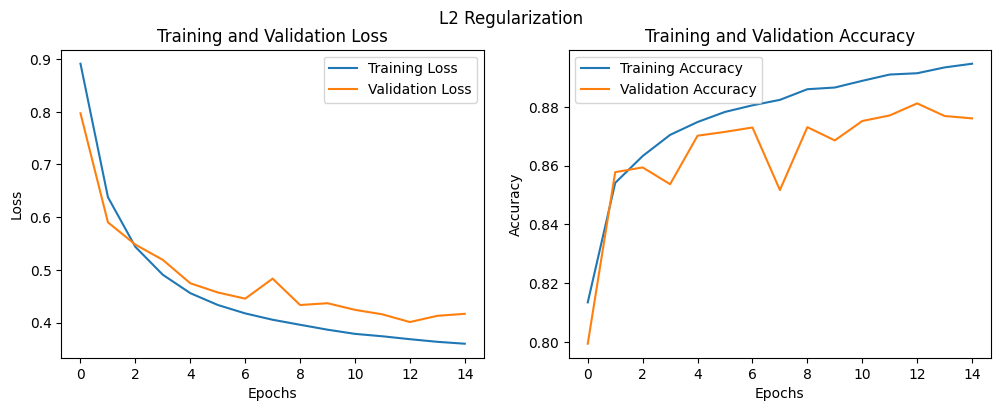

In [31]:
plot_learning_curves(l2_history, "L2 Regularization")

**L2 Regularization Impact:**
- Partial effectiveness: While the model shows signs of early convergence and increasing accuracy, the presence of fluctuations in both validation loss and accuracy, especially the steep drops, suggests that the current L2 regularization strength (0.001) might not be sufficient to completely prevent overfitting.
- Need for further tuning: This observation suggests that adjusting the L2 regularization hyperparameter might be necessary and could potentially further reduce overfitting and improve model's generalizability.
- Alternative regularization techniques: In the next sub-section 3.4.2.2 Dropout regularization, I explore another regularization technique - Dropout, which could possibly reduce overfitting further and may offer better results compared to L2 regularization.

##### 3.4.2.2 Dropout Regularization

In this stage, I apply Dropout Regularization by adding `Dropout` layers with a rate of `0.25` after each hidden layer. Similar to L2 regularization, I train the model, record training and validation metrics, and visualize learning curves.

In [33]:
from keras.layers import Dropout

dropout_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(192, activation='relu', name='hidden1'),
    Dropout(0.25, name='dropout1'),
    Dense(192, activation='relu', name='hidden2'),
    Dropout(0.25, name='dropout2'),
    Dense(10, activation=softmax, name='output')
], name='dropout_model')

metrics = [
    CategoricalAccuracy(name="categorical_accuracy"),
    macro_precision,
    macro_recall
]

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

dropout_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0003211788053607172), metrics=metrics)

dropout_model.summary()

Model: "dropout_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 192)               150720    
                                                                 
 dropout1 (Dropout)          (None, 192)               0         
                                                                 
 hidden2 (Dense)             (None, 192)               37056     
                                                                 
 dropout2 (Dropout)          (None, 192)               0         
                                                                 
 output (Dense)              (None, 10)                1930      
                                                                 
Total params: 189706 (741.04 KB)
Trainable params: 18

In [34]:
dropout_history = dropout_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 0.6208 - categorical_accuracy: 0.7821 - macro_precision: 0.8435 - macro_recall: 0.7029 - val_loss: 0.4410 - val_categorical_accuracy: 0.8396 - val_macro_precision: 0.8797 - val_macro_recall: 0.7925
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4341 - categorical_accuracy: 0.8447 - macro_precision: 0.8787 - macro_recall: 0.8115 - val_loss: 0.3858 - val_categorical_accuracy: 0.8615 - val_macro_precision: 0.8925 - val_macro_recall: 0.8294
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3942 - categorical_accuracy: 0.8581 - macro_precision: 0.8870 - macro_recall: 0.8297 - val_loss: 0.3789 - val_categorical_accuracy: 0.8656 - val_macro_precision: 0.8859 - val_macro_recall: 0.8444
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3747 - categorical_accuracy: 0.8677 - macro_precision: 0.8948 - macro_recall: 0.8432 - val_loss

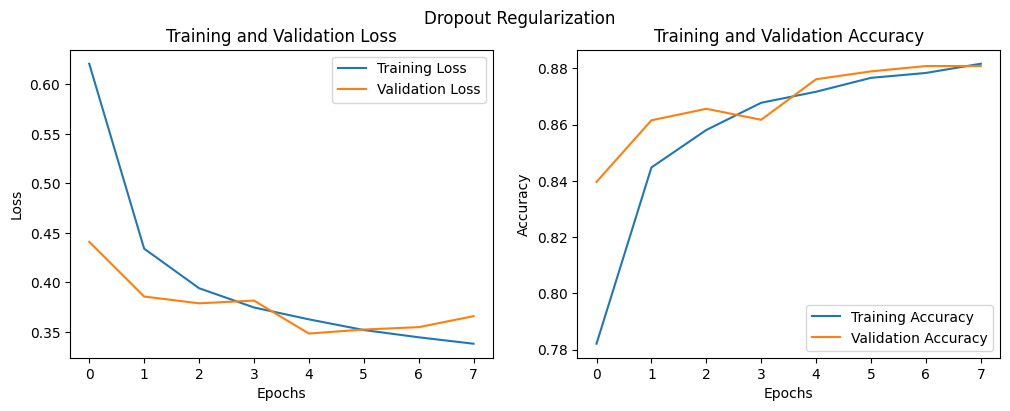

In [35]:
plot_learning_curves(dropout_history, "Dropout Regularization")

**Dropout regularization impact compared to L2 Regularization:**

While both L2 regularization (Stage 1) and Dropout regularization (Stage 2) aim to prevent overfitting, their impact on the model's training process differs.
- Convergence: Dropout appears to lead to earlier convergence for the loss metrics compared to L2 regularization. In Stage 1, convergence happened around the second epoch, whereas with Dropout, it occurs around the 2.8th, 3.2nd, and 5th epochs. This suggests Dropout might be more effective in regulating the model's learning process and reducing overfitting tendencies.
- Loss: However, the initial high training loss (around 0.63) in Stage 2 compared to Stage 1 indicates that Dropout might introduce some instability during training. The validation loss in Stage 2 also exhibits more fluctuations compared to Stage 1, suggesting that while Dropout helps with convergence, it might require more careful tuning to achieve a smoother loss curve.
- Accuracy: The increasing accuracy trend is observed in both stages. However, similar to the validation loss, the validation accuracy in Stage 2 shows more fluctuations, including a steeper drop at the 3rd epoch compared to Stage 1. This suggests that Dropout might be preventing severe overfitting but potentially hindering the model's ability to learn optimal patterns from the training data.

Overall, Dropout regularization appears to be more effective than L2 regularization in promoting early convergence of the loss metrics in your model. However, it also introduces more instability during training, as reflected in the higher initial training loss and fluctuating validation loss and accuracy.

In the next sub-section 3.4.2.3 Combined regularization, a combination of Stage 1 and 2 techniques are employed to achieve a balance between preventing overfitting and improving model performance.

##### 3.4.2.3 Combined Regularization

Finally, this last stage combines the L2 regularization and dropout regularization. I use the same `kernel_regularizer` value (0.001) and dropout rate of 0.25, as in previous stages. The model is trained, evaluated, and the learning curves are visualized.

In [37]:
combined_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(192, kernel_regularizer=l2(0.001), activation='relu', name='hidden1'),
    Dropout(0.25, name='dropout1'),
    Dense(192, kernel_regularizer=l2(0.001), activation='relu', name='hidden2'),
    Dropout(0.25, name='dropout2'),
    Dense(10, activation=softmax, name='output')
], name='combined_model')

metrics = [
    CategoricalAccuracy(name="categorical_accuracy"),
    macro_precision,
    macro_recall
]

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

combined_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0003211788053607172), metrics=metrics)

combined_model.summary()

Model: "combined_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 192)               150720    
                                                                 
 dropout1 (Dropout)          (None, 192)               0         
                                                                 
 hidden2 (Dense)             (None, 192)               37056     
                                                                 
 dropout2 (Dropout)          (None, 192)               0         
                                                                 
 output (Dense)              (None, 10)                1930      
                                                                 
Total params: 189706 (741.04 KB)
Trainable params: 1

In [38]:
combined_history = combined_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor="val_loss", patience=3)]
)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9917 - categorical_accuracy: 0.7786 - macro_precision: 0.8473 - macro_recall: 0.6934 - val_loss: 0.7348 - val_categorical_accuracy: 0.8340 - val_macro_precision: 0.8789 - val_macro_recall: 0.7870
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6828 - categorical_accuracy: 0.8385 - macro_precision: 0.8769 - macro_recall: 0.7991 - val_loss: 0.5958 - val_categorical_accuracy: 0.8547 - val_macro_precision: 0.8831 - val_macro_recall: 0.8219
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5880 - categorical_accuracy: 0.8502 - macro_precision: 0.8840 - macro_recall: 0.8163 - val_loss: 0.5465 - val_categorical_accuracy: 0.8556 - val_macro_precision: 0.8913 - val_macro_recall: 0.8207
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5359 - categorical_accuracy: 0.8563 - macro_precision: 0.8877 - macro_recall: 0.8250 - val_loss:

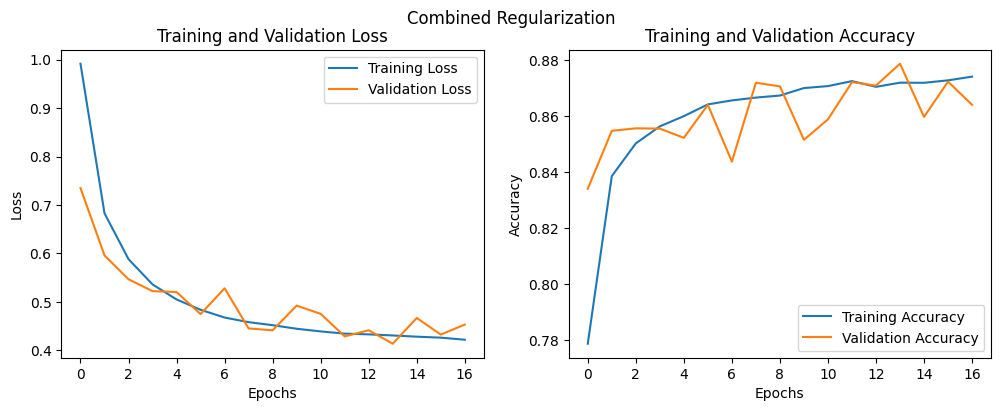

In [39]:
plot_learning_curves(combined_history, "Combined Regularization")

**Combined Regularization vs. L2 and Dropout Regularization**:
The combined regularization approach, using both L2 (0.001) and Dropout (0.25), appears to offer advantages and disadvantages compared to using them individually (Stages 1 and 2).

- Convergence: Similar to Dropout, the combined approach achieves earlier convergence of the loss metrics compared to L2 regularization. Convergence happens at multiple epochs (3rd, 5th, etc.) across training, suggesting the model might be effectively controlled and learn well from the training data.
- Loss: The combined approach addresses the high initial training loss observed in Stage 2 (Dropout). The training loss in Stage 3 starts high but decreases more steadily compared to Stage 2. However, the validation loss in Stage 3 still exhibits fluctuations, similar to Stage 2, indicating that further tuning or a different regularization strategy might be necessary for a smoother loss curve.
- Accuracy: The combined approach maintains an increasing accuracy trend like both Stage 1 and Stage 2. However, the validation accuracy in Stage 3 shows fluctuations similar to Stage 2, with steep increases followed by drops. This suggests that while the model might be learning, it's crucial to address these fluctuations to ensure generalizability on unseen data.

##### 3.4.2.4 Evaluating each of the three models on the training and validation sets

Below are codes that evaluates the three models, returning a list containing the loss and all metrics specified during the model compilation.

In [32]:
l2_train_acc = l2_model.evaluate(X_train, y_train)[1]
l2_val_acc = l2_model.evaluate(X_val, y_val)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.4168 - categorical_accuracy: 0.8761 - macro_precision: 0.8997 - macro_recall: 0.8500


In [36]:
dropout_train_acc = dropout_model.evaluate(X_train, y_train)[1]
dropout_val_acc = dropout_model.evaluate(X_val, y_val)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3659 - categorical_accuracy: 0.8808 - macro_precision: 0.8964 - macro_recall: 0.8653


In [40]:
combined_train_acc = combined_model.evaluate(X_train, y_train)[1]
combined_val_acc = combined_model.evaluate(X_val, y_val)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.4529 - categorical_accuracy: 0.8640 - macro_precision: 0.8916 - macro_recall: 0.8383


**How the Models Fare**:

Below is a table comparing the models based on their provided accuracies:

In [42]:
model_configs = ["L2 Regularization", "Dropout Regularization", "Combined Regularization"]
training_acc = [l2_train_acc, dropout_train_acc, combined_train_acc]
validation_acc = [l2_val_acc, dropout_val_acc, combined_val_acc]

df = pd.DataFrame({
    "Model Configuration": model_configs,
    "Training Accuracy": training_acc,
    "Validation Accuracy": validation_acc,
})

df

,Model Configuration,Training Accuracy,Validation Accuracy
0,L2 Regularization,0.89566,0.8761
1,Dropout Regularization,0.89644,0.8808
2,Combined Regularization,0.87742,0.8640



Looking at the accuracies, both Dropout and L2 regularization models achieve similar training accuracies of around 89% and slightly higher validation accuracies compared to the Combined regularization model. However, it's important to consider the trade-off between training and validation accuracy. A high training accuracy with a significant drop in validation accuracy suggests overfitting.

#### 3.4.3 Hyperparameter tuning for Combined Regularization model

So why use the Combined model?

Considering the trade-off between training and validation accuraccy (Difference between Training and Validation accuracies):
- L2 Regularization: 0.01956
- Dropout Regularization: 0.01564
- Combined Regularization: 0.01342

Exploring the combined model further can be worthwhile as it has the smallest trade-off and also for other various reasons such as:
1. Combining L2 regularization and Dropout can address overfitting in different ways. L2 regularization penalizes model complexity, while Dropout prevents co-adaptation of features, potentially leading to a more robust model that generalizes better.
2. Even though the initial attempt with a combined approach (0.001 L2 and 0.25 Dropout) might not be the best, there's a chance that adjusting the hyperparameters, L2 regularization strength and Dropout rate, could lead to significant improvements.

##### 3.4.3.1 Tuning `l2_reg` and `dropout_rate`

Similarly I will use `KerasTuner` to tune the L2 regularization and Dropout rates, with the base model architecture used in the Combined model in sub-section 3.4.2.3.

<table border="1">
    <tr>
        <th>Hyperparameter</th>
        <th>Search space</th>
    </tr>
    <tr>
        <td><b>l2_reg</b></td>
        <td>Min: 1e-5, Max: 0.1, Sampling of log</td>
    </tr>
    <tr>
        <td><b>dropout_rate</b></td>
        <td>Min: 0.0, Max: 0.5, Step size of 0.1</td>
    </tr>
</table>

In [44]:
def build_model(hp):
  l2_reg = hp.Float("l2_reg", min_value=1e-5, max_value=0.1, sampling="log")
  dropout_rate = hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1)

  model = keras.Sequential([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(192, kernel_regularizer=regularizers.l2(l2_reg), activation='relu', name='hidden1'),
      layers.Dropout(dropout_rate, name='dropout1'),
      layers.Dense(192, kernel_regularizer=regularizers.l2(l2_reg), activation='relu', name='hidden2'),
      layers.Dropout(dropout_rate, name='dropout2'),
      layers.Dense(10, activation=softmax, name='output')
  ])
  model.compile(
      loss='categorical_crossentropy',
      optimizer=RMSprop(learning_rate=0.0003211788053607172),
      metrics=metrics)

  return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_categorical_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="my_tuner_results",
    project_name="fashion_mnist_finals_coursework",
)

tuner.search_space_summary()
tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val), verbose=1)
tuner.results_summary()
best_trial = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trial.hyperparameters.values

best_l2_reg = best_hyperparameters["l2_reg"]
best_dropout_rate = best_hyperparameters["dropout_rate"]

print("Best L2 regularization strength:", best_l2_reg)
print("Best Dropout rate:", best_dropout_rate)

Trial 5 Complete [00h 04m 47s]
val_categorical_accuracy: 0.8257499933242798

Best val_categorical_accuracy So Far: 0.8887999951839447
Total elapsed time: 00h 25m 51s
Results summary
Results in my_tuner_results/fashion_mnist_finals_coursework
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
l2_reg: 0.00022243174972507565
dropout_rate: 0.1
Score: 0.8887999951839447

Trial 0 summary
Hyperparameters:
l2_reg: 0.0007898720050559048
dropout_rate: 0.1
Score: 0.8819000124931335

Trial 2 summary
Hyperparameters:
l2_reg: 0.002293997065101754
dropout_rate: 0.0
Score: 0.8743000030517578

Trial 1 summary
Hyperparameters:
l2_reg: 0.0032858123429015964
dropout_rate: 0.30000000000000004
Score: 0.8644500076770782

Trial 4 summary
Hyperparameters:
l2_reg: 0.04316559504901399
dropout_rate: 0.0
Score: 0.8257499933242798
Best L2 regularization strength: 0.00022243174972507565
Best Dropout rate: 0.1


**Observations and next steps**

The hyperparameter tuning process for the combined regularization model yielded a best L2 regularization strength of 0.000222 and a Dropout rate of 0.1. This configuration achieved a validation categorical accuracy of 0.8888. Notably, this represents a significant improvement compared to the initial validation accuracy of 0.8640 obtained with the untuned combined model. This finding highlights the potential benefit of hyperparameter tuning in enhancing the model's ability to learn from the training data while preventing overfitting, ultimately leading to better generalizability on unseen data. Having identified the optimal hyperparameters for L2 regularization and Dropout rate through hyperparameter tuning, I can now assess the generalizability of the combined regularization model.

To ensure an unbiased evaluation, I will bypass refitting the model on the entire training data. This is because the model has already been trained on subsets of the training data during hyperparameter tuning process using the validaiton set to prevent overfitting. Directly evaluating the final model with the best hyperparameters on unseen data will provide a more realistic measure of its performance on new, out-of-sample data.

## 4 Beyond training: Assessing Generalizability
In the following sub-sections, I will explore the model's generalizability through test set evaluation and a subsequent discussion and analysis.

### 4.1 Test set evaluation

In [50]:
final_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(192, kernel_regularizer=l2(0.00022243174972507565), activation='relu', name='hidden1'),
    Dropout(0.1, name='dropout1'),
    Dense(192, kernel_regularizer=l2(0.00022243174972507565), activation='relu', name='hidden2'),
    Dropout(0.1, name='dropout2'),
    Dense(10, activation=softmax, name='output')
], name='final_model')

final_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0003211788053607172), metrics=['accuracy'])

final_model.summary()

Model: "final_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 192)               150720    
                                                                 
 dropout1 (Dropout)          (None, 192)               0         
                                                                 
 hidden2 (Dense)             (None, 192)               37056     
                                                                 
 dropout2 (Dropout)          (None, 192)               0         
                                                                 
 output (Dense)              (None, 10)                1930      
                                                                 
Total params: 189706 (741.04 KB)
Trainable params: 1897

In [52]:
test_loss, test_acc = final_model.evaluate(test_images, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8824
Test Loss: 0.3938811719417572
Test Accuracy: 0.8823999762535095


### 4.2 Discussion and Analysis

The final combined model with tuned hyperparameters achieved a **test accuracy** of  **88.24%** on the unseen test set. This indicates good generalizability, as the model can effectively classify new data it hasn't encountered during training. The **test loss **of **0.39** further supports this finding, suggesting the model is successfully distinguishing between different classes.

These findings suggest that the combination of L2 regularization and Dropout regularization techniques, along with the chosen hyperparameter tuning strategy, has been effective in improving the model's ability to learn from the training data while preventing overfitting, ultimately leading to good performance on unseen data.

#### 4.2.1 Class specific analysis

To delve deeper into the model's performance beyond the single, high-level score accuracy provided, below depicts an analysis of class-specific accuracy. This metric assesses the model's ability to correctly classify instances for each individual class. It is calculated by dividing the number of correctly predicted instance for a class, which is the diagonal element in the confusion matrix, by the total number of instances belonging to that class, which is the corresponding row sum.

In [64]:
from sklearn.metrics import confusion_matrix

y_true = test_labels.argmax(axis=1)
y_pred = final_model.predict(test_images)

pred_class_indices = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_true, pred_class_indices)

313/313 [==============================] - 1s 2ms/step


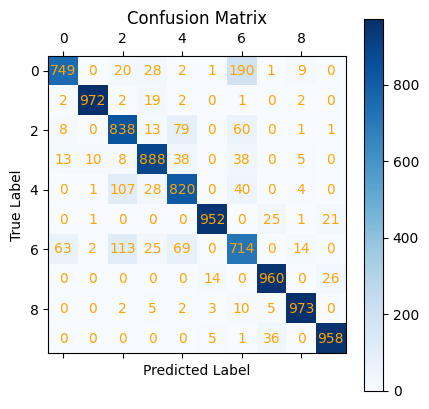

In [65]:
plt.matshow(confusion_matrix, cmap='Blues')
plt.colorbar()

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='orange')

plt.show()

In [66]:
class_specific_accuracy = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, class_accuracy in enumerate(class_specific_accuracy):
    print(f"{class_names[i]} class Accuracy: {class_accuracy:.4f}")

T-shirt/top class Accuracy: 0.7490
Trouser class Accuracy: 0.9720
Pullover class Accuracy: 0.8380
Dress class Accuracy: 0.8880
Coat class Accuracy: 0.8200
Sandal class Accuracy: 0.9520
Shirt class Accuracy: 0.7140
Sneaker class Accuracy: 0.9600
Bag class Accuracy: 0.9730
Ankle boot class Accuracy: 0.9580


The confusion matrix reveals that the model achieved high accuracy for classes *Trouser, Sandal, Sneaker, Bag,* and *Ankle boot* with accuracies above 95%. However, the model seems to be struggling to differentiate between classes *T-shirt/top* and *Shirt*, as indicated by on the confusion matrix with 190 images classified in the *Shirt* class when it's supposed to be classified in the *T-shirt/top* class. Another instance where the model is struggling, can be seen in the classes *Shirt* and *Pullover*. The model classified 113 images as a Shirt, when in fact it is a Pullover.

This implies that the model might benefit from additional training data or techniques specifically targeted towards capturing subtle differences and improving classification accuracy for these classes.

#### 4.2.2 Visualization of misclassified images

Visualizing a small sample of misclassified images can provide qualitative insights into the types of patterns the model is struggling with. This can help identify potential biases in the data or areas for improvement in the model architecture.

In [69]:
misclassified_indices = np.where(pred_class_indices != y_true)[0]
print(misclassified_indices)

[  12   17   23 ... 9972 9977 9989]


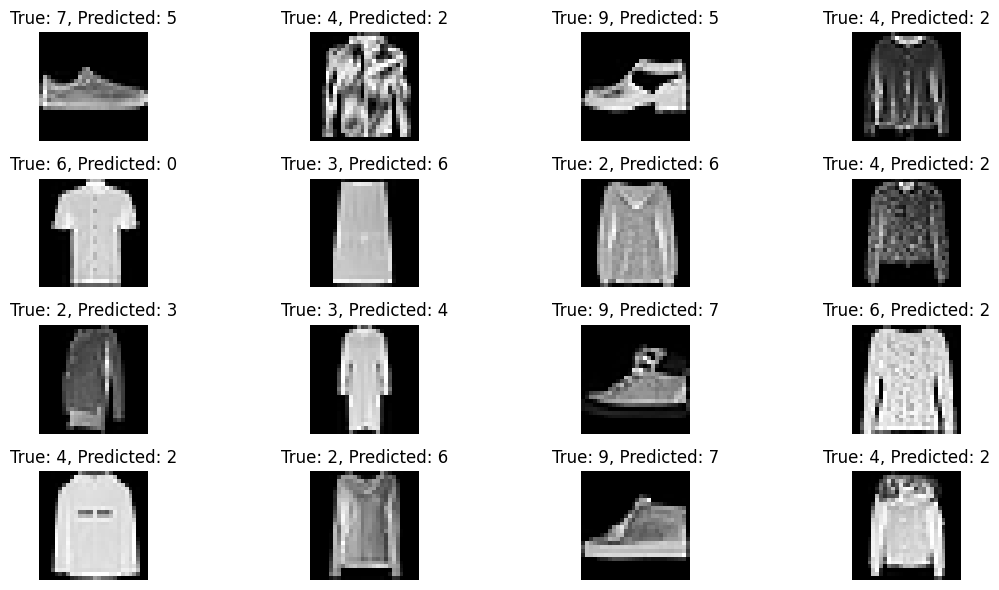

In [86]:
import random

def plot_misclassified_images(images, true_labels, predicted_labels, figsize=(12, 6), rows=4, cols=4):

  num_images = len(images)
  rows = min(rows, num_images // cols)
  cols = min(cols, num_images)

  fig, axes = plt.subplots(rows, cols, figsize=figsize)
  axes_flat = axes.ravel()

  for i in range(num_images):
    image = images[i]
    true_label = true_labels[i]
    predicted_label = predicted_labels[i]

    if len(image.shape) == 3 and image.shape[2] == 3:
      image = image[:, :, 0]
    axes_flat[i].imshow(image, cmap='gray')
    axes_flat[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axes_flat[i].axis('off')

  fig.tight_layout()
  plt.show()

num_misclassified = len(misclassified_indices)
num_to_visualize = 16

selected_indices = misclassified_indices[:16]

selected_images = test_images[selected_indices]
selected_true_labels = y_true[selected_indices]
selected_predicted_labels = pred_class_indices[selected_indices]

plot_misclassified_images(selected_images, selected_true_labels, selected_predicted_labels)

**Misclassifications Analysis**
- Some misclassified items seem to be visually similar to the true label. For instance the image in row 3 column 3 and the image in row 4 column 3,
have the True label of class 9, which is *Ankle boot* but both images were predicted to be in class 7, which is *Sneaker*.
- Another instance would be all the images in the last column. Their True labels are either class 4 or 6 which *Coat* or *Shirt* respectively, but was predicted as a *Pullover*.

These misclassifications could be due to the model not being able to distinguish subtle differences between clothing items.

## 5 Conclusion

### 5.1 Key findings
In this finals coursework, I explored different Neural Network architectures and applied deep learning techniques for image classification. The final model I built, to classify clothing items and evaluated its performance on the test set, achieved a test accuracy of 88.24%, indicating reasonable ability that generalizes well to unseen data. The confusion matrix analysis revealed areas for improvement, particularly differentiating between visually similar clothing categories. Additionally, visualization of misclassified images highlighted challenges in distinguishing subtle features.

### 5.2 Limitations

I encountered limitations in two key areas: data availability and computational resources. The availability of a larger and more diverse dataset of clothing images could have potentially improved the model's ability to handle a wider range of styles and variations. Additionally, access to a GPU runtime environment would have facilitated faster training times and potentially allowed for exploration of more complex model architectures that might benefit from the increased processing power. While the current model achieved reasonable performance, these limitations highlight the potential for further improvement with more extensive data and computational resources.

### 5.3 Future work
Several avenues exist for further exploration. First, acquiring a larger and more diverse dataset of clothing images could enhance the model's ability to handle variations in style and appearance. Additionally, exploring techniques like data augmentation to artificially increase dataset size and improve robustness might be beneficial. Furthermore, investigating different model architectures or hyperparameter tuning could potentially improve classification accuracy for specific clothing categories.



Overall, this assignment provided valuable experience in building Neural Networks for image classification, with findings highlighting the model's strengths and weaknesses, offering a roadmap for future improvements.

## 6 References

Xiao, H., Rasul , K., & Vollgraf, R. (2017, August 28). Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms.
https://github.com/zalandoresearch/fashion-mnist


Chollet, F. (2023, December 7). *Basic classification: Classify images of clothing*. TensorFlow.
https://www.tensorflow.org/tutorials/keras/classification


Vamsi, R. (2021, May 17). *Image classifications*. GitHub.
https://github.com/krvamsi96/Image-classifications


*TensorFlow metrics: Categorical Accuracy*. TensorFlow. (2024, January 11).
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy


*TensorFlow metrics: Precision*. TensorFlow. (2024, January 11).
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision


*TensorFlow metrics: Recall*. TensorFlow. (2024, January 11).
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall


Chollet, F. (2023, December 7). *Overfit and underfit*. TensorFlow.
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit


Gualberto, A. (2020, September 7). *Custom metrics for Keras/TensorFlow*. Medium.
https://medium.com/analytics-vidhya/custom-metrics-for-keras-tensorflow-ae7036654e05


*TensorFlow activations: softmax*. TensorFlow. (2024, January 11).
https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax


Pykes, K. (2024, January 11). *Cross-entropy loss function in machine learning: Enhancing model accuracy*. DataCamp.
https://www.datacamp.com/tutorial/the-cross-entropy-loss-function-in-machine-learning


Chollet, F., Bursztein, E., Long, J., O’Malley, T., Jin, H., & Invernizzi, L. (2019). *KerasTuner*. Keras.
https://keras.io/keras_tuner/


Chollet, F., Bursztein, E., Long, J., O’Malley, T., Jin, H., & Invernizzi, L. (2019). *Getting started with KerasTuner*
https://keras.io/guides/keras_tuner/getting_started/


Bhobe, M. (2019, July 14). *Classifying fashion with a keras CNN (achieving 94% accuracy) - part 2*. Medium.
https://medium.com/@mjbhobe/classifying-fashion-with-a-keras-cnn-achieving-94-accuracy-part-2-a5bd7a4e7e5a


Sheth, D. (2023, June 13). *How to plot misclassified images of Your Image Classification Model*. Medium.
https://medium.com/@devamsheth20/how-to-plot-misclassified-images-of-your-image-classification-model-8d464e15d6d7


Venkatachalam. (2020, May 24). *Display misclassified digits from confusion matrix*. Stack Overflow.
https://stackoverflow.com/questions/61980660/display-misclassified-digits-from-confusion-matrix


Agrawal, S. (2021, January 2). *Understanding the confusion matrix from Scikit learn*. Medium.
https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79


T, D. (2019, July 25). *Confusion matrix visualization*. Medium.
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea